In [1]:
# 1. Import thư viện cần thiết
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression



In [2]:
# 2. Đọc file csv và gắng index với giá Close
data = pd.read_csv('../../Dataset/VCB-Historical-Data_Group-9.csv', index_col='Date', parse_dates=True)

# Tiền xử lí dữ liệu


In [3]:
# 3. Chuyển các giá trị trong cột về number
# Hàm chuyển đổi "Vol." từ chuỗi sang số
def convert_volume_to_number(volume_str):
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    elif volume_str[-1] == 'B':
        return int(float(volume_str[:-1]) * 1000000000)
    else:
        return int(volume_str)
    
# Áp dụng hàm chuyển đổi cho cột "Vol."
data["Vol."] = data["Vol."].apply(convert_volume_to_number)

# Hàm chuyển đổi "Change %" từ chuỗi sang số
def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%')) / 100
    return new_change

# Áp dụng hàm chuyển đổi cho cột "Change %"
data["Change %"] = data["Change %"].apply(convert_change_to_number)

# Hàm chuyển giá từ chuỗi sang số
def convert_str_to_number(str):
    return float(str.replace(',', ''))

# Áp dụng hàm chuyển đổi cho các cột giá trị
data['Price'] = data['Price'].apply(convert_str_to_number)
data['Open'] = data['Open'].apply(convert_str_to_number)
data['High'] = data['High'].apply(convert_str_to_number)
data['Low'] = data['Low'].apply(convert_str_to_number)

data

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2019-03-01,47765.0,46844.0,47765.0,46690.0,910430,0.0281
2019-03-04,48226.0,47765.0,48379.0,47765.0,1720000,0.0097
2019-03-05,48379.0,48226.0,48994.0,47995.0,2009999,0.0032
2019-03-06,48149.0,48456.0,48610.0,47535.0,1380000,-0.0048
2019-03-07,48456.0,48149.0,48994.0,48072.0,2420000,0.0064
...,...,...,...,...,...,...
2024-05-27,90200.0,90400.0,90600.0,89700.0,1060000,0.0000
2024-05-28,90700.0,89800.0,90700.0,89800.0,1350000,0.0055
2024-05-29,89800.0,90800.0,91000.0,89800.0,1190000,-0.0099


In [4]:
# 4. Loại các giá trị null
data = data.dropna() # Drop missing values
data = data.reset_index(drop=True) # Reset the index

In [5]:
# 5. Chia train test
df = data
df = df[['Price']]
# Split the data into training, testing, and validation sets
train_size = int(0.9 * len(df))
test_size = len(df) - train_size 

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [6]:
# 6. Chạy auto Arima
from pmdarima.arima import auto_arima
model = auto_arima(train_data, start_p=1, start_q=1,
                   max_p=5, max_q=5, m=12,  
                   start_P=0, seasonal=True,
                   d=1, D=1, trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)
model.fit(train_data)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=2.46 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=20832.564, Time=0.09 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=20534.951, Time=1.86 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.95 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=20834.453, Time=0.14 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=20409.199, Time=6.81 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=7.80 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.79 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=20408.410, Time=2.87 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=20533.578, Time=0.28 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=5.64 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.96 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=20409.200, Time=4.96 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=inf, Time=5.36 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=2040

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [7]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1181
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 12)   Log Likelihood              -10201.205
Date:                            Thu, 06 Jun 2024   AIC                          20408.410
Time:                                    16:09:05   BIC                          20423.599
Sample:                                         0   HQIC                         20414.139
                                           - 1181                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.5859      0.007    -84.029      0.000      -0.600      -0.572
ar.S.L24      -0.2781      0.006    -43.535      0.000      -0.291      -0.266
sigma2       2.07e+06   4.41e+04     46.890      0.000    1.98e+06    2.16e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):              2544.90
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                            -0.79
Prob(H) (two-sided):                  0.76   Kurtosis:                        10.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
# 7. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test))


In [9]:
# 8. Dự đoán 30 ngày tiếp theo
last_index_30 =  df.index[-1]
last_data_30 = pd.RangeIndex(start=last_index_30, stop=last_index_30+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index_30+1, last_index_30+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
1181    88479.840237
1182    88795.612267
1183    89091.880178
1184    88772.376060
1185    88534.231349
1186    88129.698193
1187    88033.656417
1188    88083.183172
1189    87012.406994
1190    86822.334578
1191    87294.524859
1192    88136.444268
1193    88903.260639
1194    89202.797043
1195    89639.253241
1196    89476.173035
1197    89172.928644
1198    88719.452847
1199    88965.655916
1200    88910.775632
1201    87826.897001
1202    87232.750762
1203    87721.235610
1204    88843.453004
1205    89651.316549
1206    90150.647776
1207    90756.288708
1208    90562.598412
1209    90530.583604
1210    89884.567712
dtype: float64


In [10]:
# 9. Dự đoán 60 ngày tiếp theo
last_index_60 =  df.index[-1]
last_data_60 = pd.RangeIndex(start=last_index_60, stop=last_index_60+60, step=1)

# Create an array of 60 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index_60+1, last_index_60+61)).reshape(-1, 1)

# Predict the closing prices for the next 60 days
y_next_60_days = model.predict(n_periods=len(x_next_60_days))

# Print the predicted closing prices for the next 60 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

Predicted closing prices for the next 60 days:
1181    88479.840237
1182    88795.612267
1183    89091.880178
1184    88772.376060
1185    88534.231349
1186    88129.698193
1187    88033.656417
1188    88083.183172
1189    87012.406994
1190    86822.334578
1191    87294.524859
1192    88136.444268
1193    88903.260639
1194    89202.797043
1195    89639.253241
1196    89476.173035
1197    89172.928644
1198    88719.452847
1199    88965.655916
1200    88910.775632
1201    87826.897001
1202    87232.750762
1203    87721.235610
1204    88843.453004
1205    89651.316549
1206    90150.647776
1207    90756.288708
1208    90562.598412
1209    90530.583604
1210    89884.567712
1211    90290.664599
1212    89838.230855
1213    88531.424543
1214    88087.847559
1215    88574.518726
1216    89771.130731
1217    90558.565379
1218    90945.345773
1219    91412.870213
1220    91193.614259
1221    91020.781758
1222    90501.191823
1223    90718.424691
1224    90527.965014
1225    89355.422622
1226    

In [11]:
# 10. Dự đoán 90 ngày tiếp theo
last_index_90 =  df.index[-1]
last_data_90 = pd.RangeIndex(start=last_index_90, stop=last_index_90+90, step=1)

# Create an array of 90 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index_90+1, last_index_90+91)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_90_days = model.predict(n_periods=len(x_next_90_days))

# Print the predicted closing prices for the next 90 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 90 days:
1181    88479.840237
1182    88795.612267
1183    89091.880178
1184    88772.376060
1185    88534.231349
            ...     
1266    94053.385440
1267    94559.781503
1268    94358.122952
1269    94208.337003
1270    93659.494240
Length: 90, dtype: float64


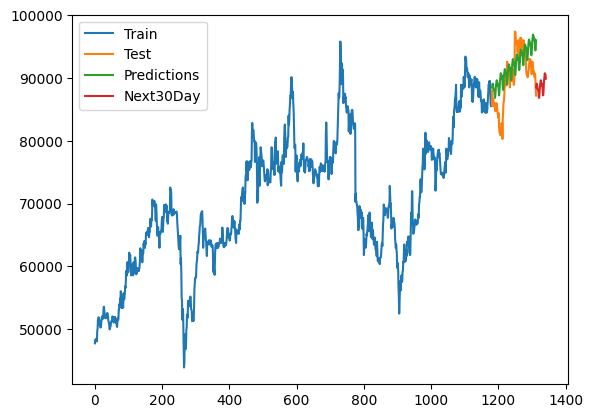

In [12]:
#11. Vẽ đồ thị các giá trị từ train tới test và dự đoán 30 ngày sau
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_30,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

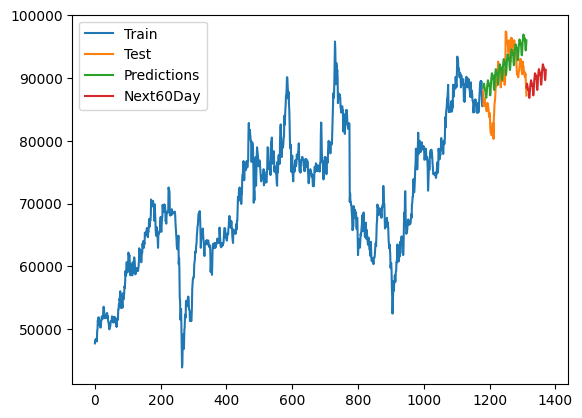

In [13]:
#12. Vẽ đồ thị các giá trị từ train tới test và dự đoán 60 ngày sau

plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_60,y_next_60_days)
plt.legend(['Train', 'Test', 'Predictions','Next60Day'])
plt.show()

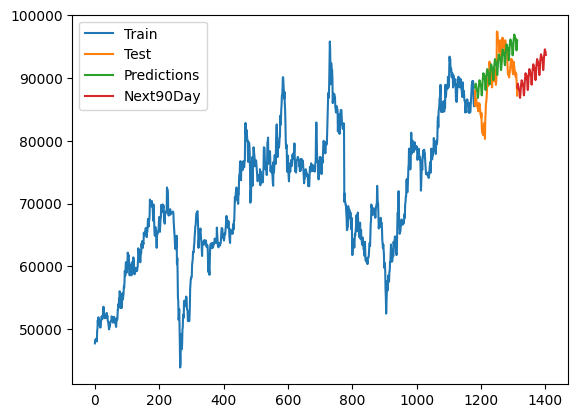

In [14]:
#12. Vẽ đồ thị các giá trị từ train tới test và dự đoán 90 ngày sau
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data_90,y_next_90_days)
plt.legend(['Train', 'Test', 'Predictions','Next90Day'])
plt.show()

In [15]:
#13. Đánh giá mô hình

# Tính MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Tính MAE
def calculate_mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Tính toán RMSE, MAPE và MAE cho tập test
test_rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
test_mape = calculate_mape(y_test, y_pred)
test_mae = calculate_mae(y_test, y_pred)

# In kết quả
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)


Testing RMSE: 3827.014787426119
Testing MAPE: 3.549461630476119
Testing MAE: 3130.8613607483876
